In [ ]:
!pip install -U scikit-learn


In [ ]:
import sklearn
print("scikit-learn version:", sklearn.__version__)


scikit-learn version: 1.7.1


In [ ]:
import numpy as np
import pandas as pd
np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score , precision_score, recall_score,f1_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier, StackingClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('dataset.csv')
print(df.head())
print(df.info())


   id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473

In [ ]:
print(f"Dataset shape :{df.shape}")

Dataset shape :(20758, 18)


In [ ]:
print(df.isnull().sum())

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [ ]:
print(df.describe())

                id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.

In [ ]:
print(df['NObeyesdad'].value_counts())

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64


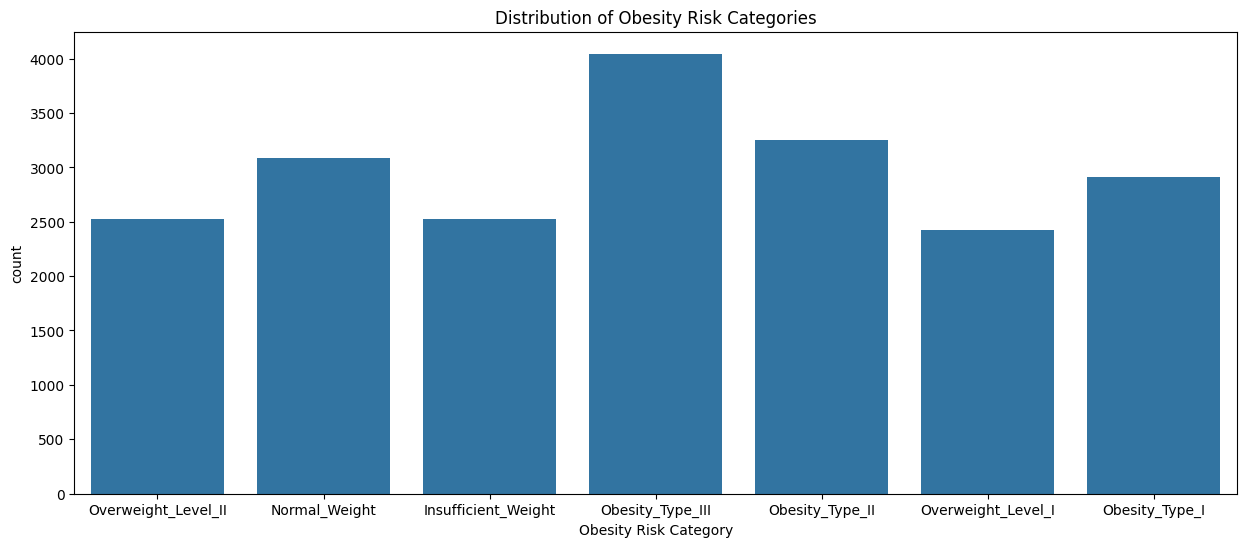

In [ ]:
plt.figure(figsize=(15,6
                    ))
sns.countplot(x='NObeyesdad',data=df)
plt.title("Distribution of Obesity Risk Categories")
plt.xlabel("Obesity Risk Category")
plt.ylabel("count")
plt.show()


<Axes: xlabel='Age', ylabel='Count'>

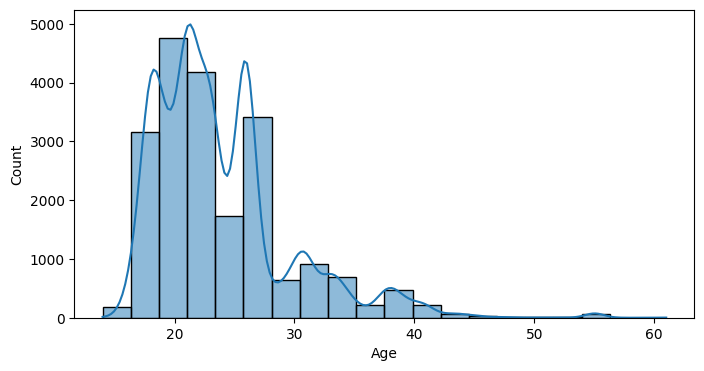

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'],bins=20,kde=True)

In [ ]:
categorical_columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
                       'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
le=LabelEncoder()
for col in categorical_columns[:-1]:
  df[col]=le.fit_transform(df[col])
print(df.head())


   id  Gender        Age    Height      Weight  \
0   0       1  24.443011  1.699998   81.669950   
1   1       0  18.000000  1.560000   57.000000   
2   2       0  18.000000  1.711460   50.165754   
3   3       0  20.952737  1.710730  131.274851   
4   4       1  31.641081  1.914186   93.798055   

   family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                               1     1  2.000000  2.983297     2      0   
1                               1     1  2.000000  3.000000     1      0   
2                               1     1  1.880534  1.411685     2      0   
3                               1     1  3.000000  3.000000     2      0   
4                               1     1  2.679664  1.971472     2      0   

       CH2O  SCC       FAF       TUE  CALC  MTRANS           NObeyesdad  
0  2.763573    0  0.000000  0.976473     1       3  Overweight_Level_II  
1  2.000000    0  1.000000  1.000000     2       0        Normal_Weight  
2  1.910378    0  0.

In [ ]:
X= df.drop('NObeyesdad',axis=1)
y=df['NObeyesdad']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)


In [ ]:
numeric_columns=X.select_dtypes(include=['float64','int64']).columns
scaler=StandardScaler()
X_train[numeric_columns]=scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns]=scaler.transform(X_test[numeric_columns])
print(f"Training set : { X_train.shape},Test set: {X_test.shape}")

Training set : (16606, 17),Test set: (4152, 17)


In [ ]:
dt_model=DecisionTreeClassifier(random_state=42)
lr_model=LogisticRegression(max_iter=1000,random_state=42)
knn_model=KNeighborsClassifier(n_neighbors=5)
dt_model.fit(X_train,y_train)
lr_model.fit(X_train,y_train)
knn_model.fit(X_train,y_train)
dt_preds=dt_model.predict(X_test)
lr_preds = lr_model.predict(X_test)
knn_preds = knn_model.predict(X_test)



In [ ]:
print("Decision Tree Accuracy :",accuracy_score(y_test,dt_preds))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("KNN Accuracy:", accuracy_score(y_test, knn_preds))


Decision Tree Accuracy : 0.8427263969171483
Logistic Regression Accuracy: 0.8615125240847784
KNN Accuracy: 0.7367533718689788


In [ ]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_preds))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_preds))

print("KNN Classification Report:")
print(classification_report(y_test, knn_preds))

print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dt_preds))



Decision Tree Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.89      0.89       505
      Normal_Weight       0.78      0.81      0.80       617
     Obesity_Type_I       0.80      0.82      0.81       582
    Obesity_Type_II       0.93      0.94      0.94       650
   Obesity_Type_III       0.99      0.99      0.99       809
 Overweight_Level_I       0.67      0.65      0.66       485
Overweight_Level_II       0.72      0.69      0.71       504

           accuracy                           0.84      4152
          macro avg       0.83      0.83      0.83      4152
       weighted avg       0.84      0.84      0.84      4152

Logistic Regression Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.95      0.91       505
      Normal_Weight       0.87      0.80      0.84       617
     Obesity_Type_I       0.80      0.85      0.82       582
 

In [ ]:
rf_model= RandomForestClassifier(n_estimators=100,random_state=42)
ada_model=AdaBoostClassifier(n_estimators=50,random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
voting_model=VotingClassifier(estimators=[('dt',dt_model),('lr',lr_model),('knn',knn_model)],voting='hard')

stacking_model= StackingClassifier(estimators=[('dt',dt_model),('lr',lr_model),('knn',knn_model)],final_estimator=LogisticRegression(max_iter=1000,random_state=42))
rf_model.fit(X_train,y_train)
ada_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
voting_model.fit(X_train, y_train)
stacking_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
ada_preds = ada_model.predict(X_test)
gb_preds = gb_model.predict(X_test)
voting_preds = voting_model.predict(X_test)
stacking_preds = stacking_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_preds))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_preds))
print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_preds))
print("Stacking Classifier Accuracy:", accuracy_score(y_test, stacking_preds))

Random Forest Accuracy: 0.9029383429672447
AdaBoost Accuracy: 0.7001445086705202
Gradient Boosting Accuracy: 0.9075144508670521
Voting Classifier Accuracy: 0.859344894026975
Stacking Classifier Accuracy: 0.8829479768786127


In [ ]:






model_names = [ "Decision Tree", "Logistic Regression", "KNN", "Random Forest", "AdaBoost", "Gradient Boosting", "Voting Classifier","Stacking Classifier"]
accuracies = [ accuracy_score(y_test, dt_preds),accuracy_score(y_test, lr_preds),accuracy_score(y_test, knn_preds),accuracy_score(y_test, rf_preds),accuracy_score(y_test, ada_preds),accuracy_score(y_test, gb_preds),accuracy_score(y_test, voting_preds),accuracy_score(y_test, stacking_preds)]


for name, acc in zip(model_names, accuracies):
    print(f"{name:22}: {acc:.4f}")


Decision Tree         : 0.8427
Logistic Regression   : 0.8615
KNN                   : 0.7368
Random Forest         : 0.9029
AdaBoost              : 0.7001
Gradient Boosting     : 0.9075
Voting Classifier     : 0.8593
Stacking Classifier   : 0.8829


In [ ]:
model_names = [
    "Decision Tree", "Logistic Regression", "KNN", "Random Forest",
    "AdaBoost", "Gradient Boosting", "Voting Classifier", "Stacking Classifier"
]

model_preds = [dt_preds, lr_preds, knn_preds, rf_preds, ada_preds, gb_preds, voting_preds, stacking_preds]

metrics = []
for preds in model_preds:
    metrics.append([
        accuracy_score(y_test, preds),
        precision_score(y_test, preds, average='weighted', zero_division=0),
        recall_score(y_test, preds, average='weighted', zero_division=0),
        f1_score(y_test, preds, average='weighted', zero_division=0)])


metrics_df = pd.DataFrame(metrics, columns=["Accuracy", "Precision", "Recall", "F1-score"], index=model_names)
print(metrics_df)


                     Accuracy  Precision    Recall  F1-score
Decision Tree        0.842726   0.841864  0.842726  0.842201
Logistic Regression  0.861513   0.859898  0.861513  0.860130
KNN                  0.736753   0.730197  0.736753  0.731426
Random Forest        0.902938   0.902349  0.902938  0.902360
AdaBoost             0.700145   0.719331  0.700145  0.688891
Gradient Boosting    0.907514   0.907154  0.907514  0.907102
Voting Classifier    0.859345   0.857794  0.859345  0.856239
Stacking Classifier  0.882948   0.882418  0.882948  0.882606


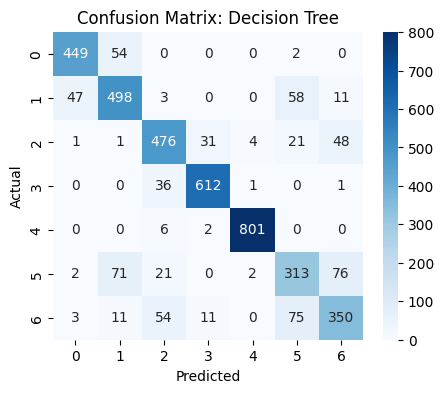

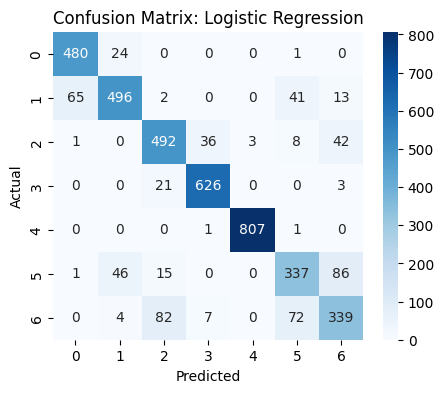

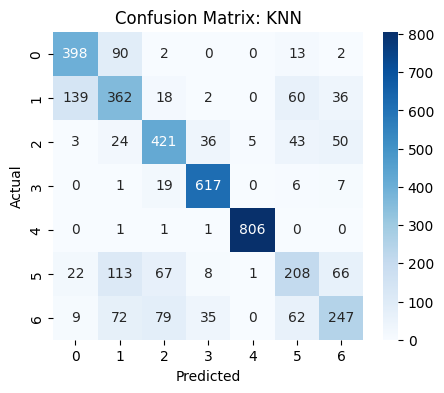

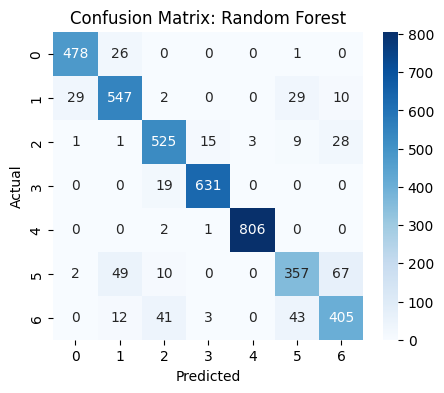

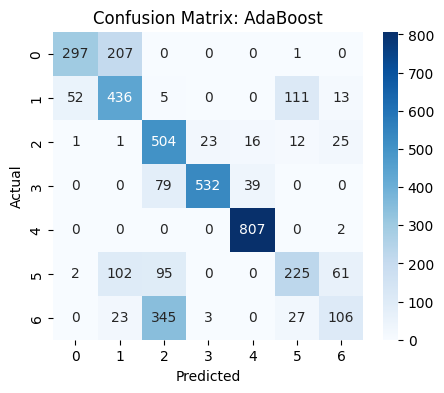

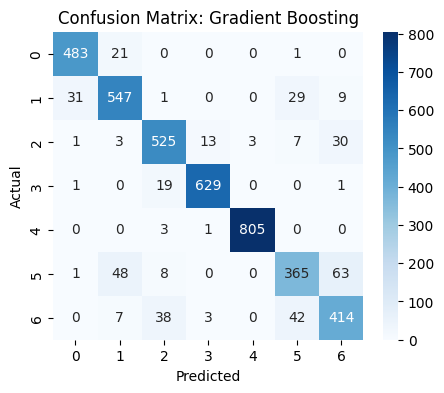

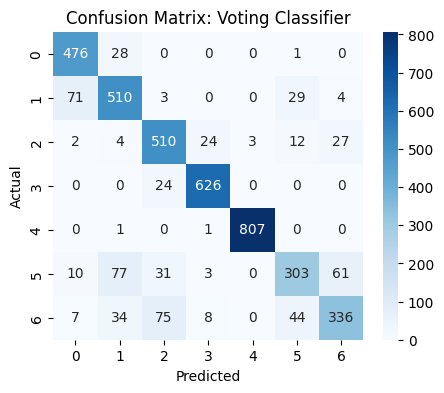

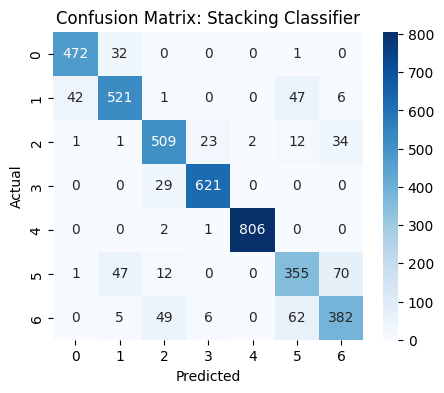

In [ ]:
for name, preds in zip(model_names, model_preds):
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


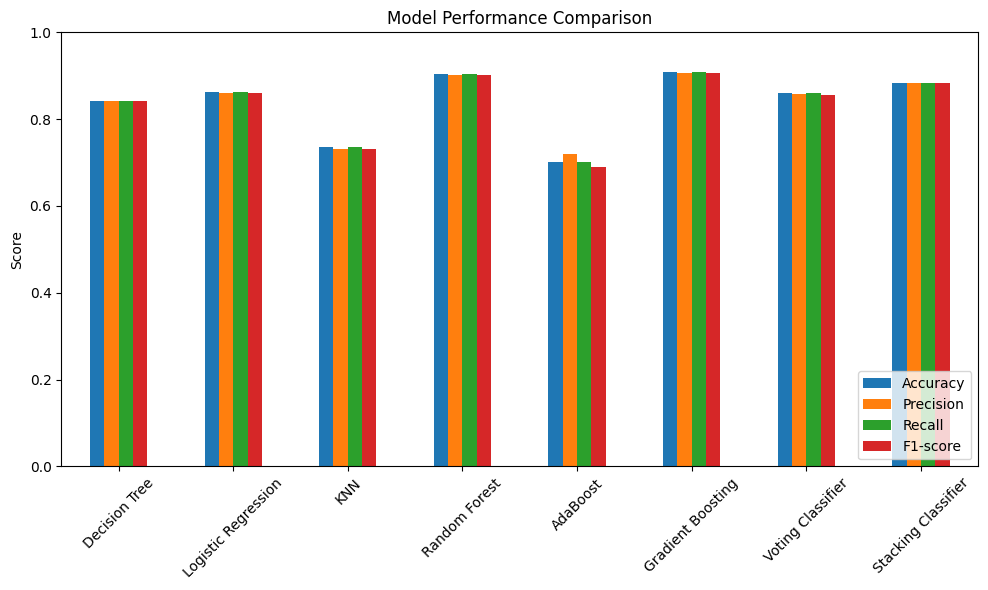

In [ ]:
metrics_df.plot(kind='bar', figsize=(10,6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
